In [2]:
#Importing libraries
library(tidyverse)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Step 1: Lets list out some things to answer and load data:
1. Global temperatures annually change trends
2. Global temperatures monthtly change trends across years
3. Annual range variation across years 
4. Annual min/max temperature across years 
5. Temperature category wise countries distribution to see which category is increasing most.

In [3]:
#loading dataset
data=read_csv("~/Downloads/temp_country_2020.csv")
head(data)

Rows: 54720 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Country
dbl  (3): Month, Year, Temp
date (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Date,Country,Month,Year,Temp
<date>,<chr>,<dbl>,<dbl>,<dbl>
1900-01-01,Argentina,1,1900,21.778
1900-01-01,Austria,1,1900,-2.278
1900-01-01,Bahrain,1,1900,14.974
1900-01-01,Belarus,1,1900,-6.775
1900-01-01,Belgium,1,1900,2.868
1900-01-01,Bulgaria,1,1900,0.814


In [143]:
unique((data %>% filter(Year == 2000))['Date']) # Shows that there is only monthly data available not daily.

Date
<date>
2000-01-01
2000-02-01
2000-03-01
2000-04-01
2000-05-01
2000-06-01
2000-07-01
2000-08-01
2000-09-01


In [27]:
#summary of the dataset
summary(data)

      Date              Country              Month            Year     
 Min.   :1900-01-01   Length:54720       Min.   : 1.00   Min.   :1900  
 1st Qu.:1929-12-24   Class :character   1st Qu.: 3.75   1st Qu.:1930  
 Median :1959-12-16   Mode  :character   Median : 6.50   Median :1960  
 Mean   :1959-12-16                      Mean   : 6.50   Mean   :1960  
 3rd Qu.:1989-12-08                      3rd Qu.: 9.25   3rd Qu.:1989  
 Max.   :2019-12-01                      Max.   :12.00   Max.   :2019  
      Temp        
 Min.   :-59.324  
 1st Qu.:  7.212  
 Median : 15.413  
 Mean   : 14.937  
 3rd Qu.: 22.689  
 Max.   : 40.443  

In [28]:
#checking for NA values
nadate=sum(is.na(data["Date"]))
nacountry=sum(is.na(data["Country"]))
namonth=sum(is.na(data["Month"]))
nayear=sum(is.na(data["Year"]))
natemp=sum(is.na(data["Temp"]))
namonth
nayear
natemp
nacountry
nadate

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

#### Above data values show that the table is clean and not needing any more cleaning.

### Step 2: Gather some country specific info for last century 1900-2019 and add columns. To assess trends across countries let us divide them into 3 buckets and assess each to see the impact instead of assessing on all 38 countries in dataset.

In [166]:
# Gather some country specific info for last century
fun <- function(x) {
    if (x < 10) {
        "Low"
    }
    else if (x < 20) {
        "Medium"
    }
    else {
        "High"
    }
}

mean_countries <- data %>% group_by(Country) %>%
    summarize(mean_monthly_1900_2019 = mean(Temp), 
              min_monthly_1900_2019 = min(Temp), 
              max_monthly_1900_2019 = max(Temp),
              temp_category = factor(fun(mean_monthly_1900_2019), levels = c("Low", "Medium", "High"))) 

print('Low category countries')
print((mean_countries %>% filter(temp_category == "Low") %>% count())$n)

print('Medium category countries')
print((mean_countries %>% filter(temp_category == "Medium") %>% count())$n)

print('High category countries')
print((mean_countries %>% filter(temp_category == "High") %>% count())$n)

head(mean_countries)

[1] "Low category countries"
[1] 13
[1] "Medium category countries"
[1] 14
[1] "High category countries"
[1] 11


Country,mean_monthly_1900_2019,min_monthly_1900_2019,max_monthly_1900_2019,temp_category
<chr>,<dbl>,<dbl>,<dbl>,<fct>
Argentina,14.926506,2.722222,25.64516,Medium
Austria,6.737084,-11.077000,23.70072,Low
Bahrain,26.179489,12.160000,37.47100,High
Belarus,5.879154,-42.281362,22.81100,Low
Belgium,9.828761,-6.079000,22.83700,Low
Bulgaria,10.778672,-6.903000,25.06300,Medium


### Step 3: Load some info for each country and year such as annual min, max, range, mean

In [169]:
data_country <- data %>% 
    group_by(Country, Year) %>%
    summarize(mean_monthly = mean(Temp), 
              min_monthly = min(Temp), 
              max_monthly = max(Temp))

data_country <- inner_join(data_country, mean_countries)
head(data_country)

`summarise()` has grouped output by 'Country'. You can override using the
`.groups` argument.
Joining, by = "Country"


Country,Year,mean_monthly,min_monthly,max_monthly,mean_monthly_1900_2019,min_monthly_1900_2019,max_monthly_1900_2019,temp_category
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Argentina,1900,14.80725,8.740,21.778,14.92651,2.722222,25.64516,Medium
Argentina,1901,14.80933,7.836,20.698,14.92651,2.722222,25.64516,Medium
Argentina,1902,14.62117,6.905,21.509,14.92651,2.722222,25.64516,Medium
Argentina,1903,14.37608,7.527,20.551,14.92651,2.722222,25.64516,Medium
Argentina,1904,14.43233,8.506,20.788,14.92651,2.722222,25.64516,Medium
Argentina,1905,14.19142,6.749,20.421,14.92651,2.722222,25.64516,Medium


In [170]:
# Let us find the country for maximum and min average temperatures in last years
temp_data <- data %>% 
    group_by(Country) %>%
    summarize(mean_temp = mean(Temp))

temp_data[which.max(temp_data$mean_temp),]
temp_data[which.min(temp_data$mean_temp),]

Country,mean_temp
<chr>,<dbl>
United Arab Emirates,27.90601


Country,mean_temp
<chr>,<dbl>
Iceland,1.935896


In [4]:
uae_temp  <- data %>% 
    filter(Country == 'United Arab Emirates') %>%
    group_by(Year) %>%
    summarize(mean_temp = mean(Temp))

iceland_temp  <- data %>% filter(Country == 'Iceland') %>%
    group_by(Year) %>%
    summarize(mean_temp = mean(Temp))

head(uae_temp)
head(iceland_temp)

Year,mean_temp
<dbl>,<dbl>
1900,27.58792
1901,27.63625
1902,27.85033
1903,27.05725
1904,27.62967
1905,27.50392


Year,mean_temp
<dbl>,<dbl>
1900,1.3640833
1901,1.7332500
1902,0.7196667
1903,0.6740833
1904,1.4333333
1905,1.3966667


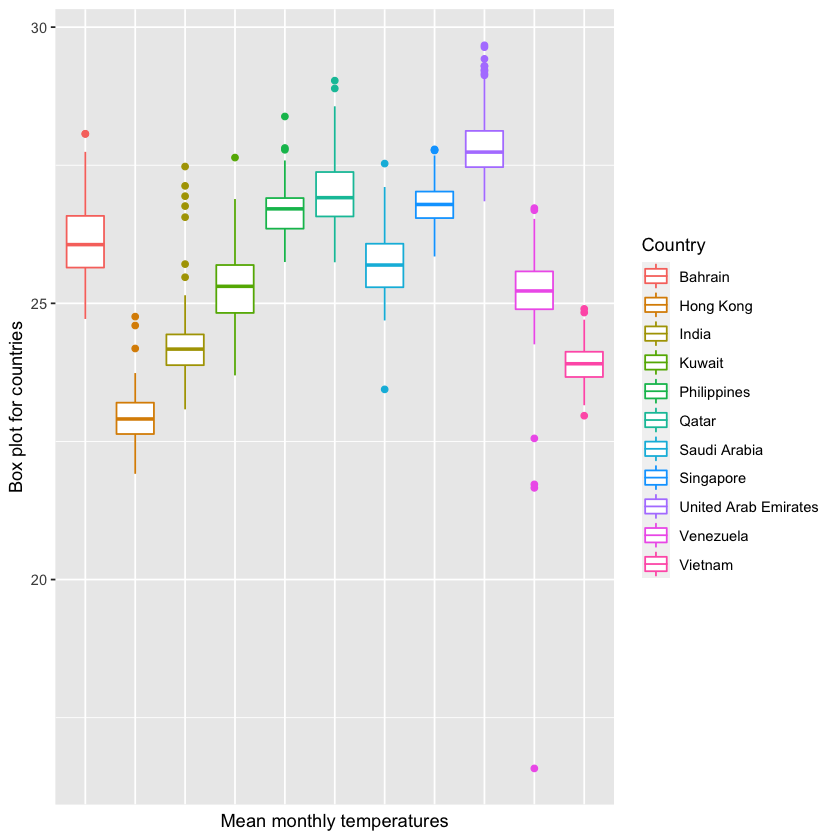

In [184]:
data_country %>%
    filter(temp_category == "High") %>%
    ggplot(aes(x = Country, y = mean_monthly, color = Country)) + 
    geom_boxplot() +
    xlab("Mean monthly temperatures") +
    ylab("Box plot for countries") +
    theme(axis.text.x=element_blank(),
        axis.ticks.x=element_blank())

#### Above graph shows outliers for Venezeula but the values are not wrong as printed below.

In [195]:
data_venezuela <- data_country %>% filter(Country == 'Venezuela')
data_venezuela[which.min(data_venezuela$mean_monthly),]
data_venezuela[which.max(data_venezuela$mean_monthly),]

Country,Year,mean_monthly,min_monthly,max_monthly,mean_monthly_1900_2019,min_monthly_1900_2019,max_monthly_1900_2019,temp_category
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Venezuela,2016,16.58097,-59.32407,28.49444,25.11296,-59.32407,29.44086,High


Country,Year,mean_monthly,min_monthly,max_monthly,mean_monthly_1900_2019,min_monthly_1900_2019,max_monthly_1900_2019,temp_category
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Venezuela,2014,26.72379,22.81548,28.02222,25.11296,-59.32407,29.44086,High


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



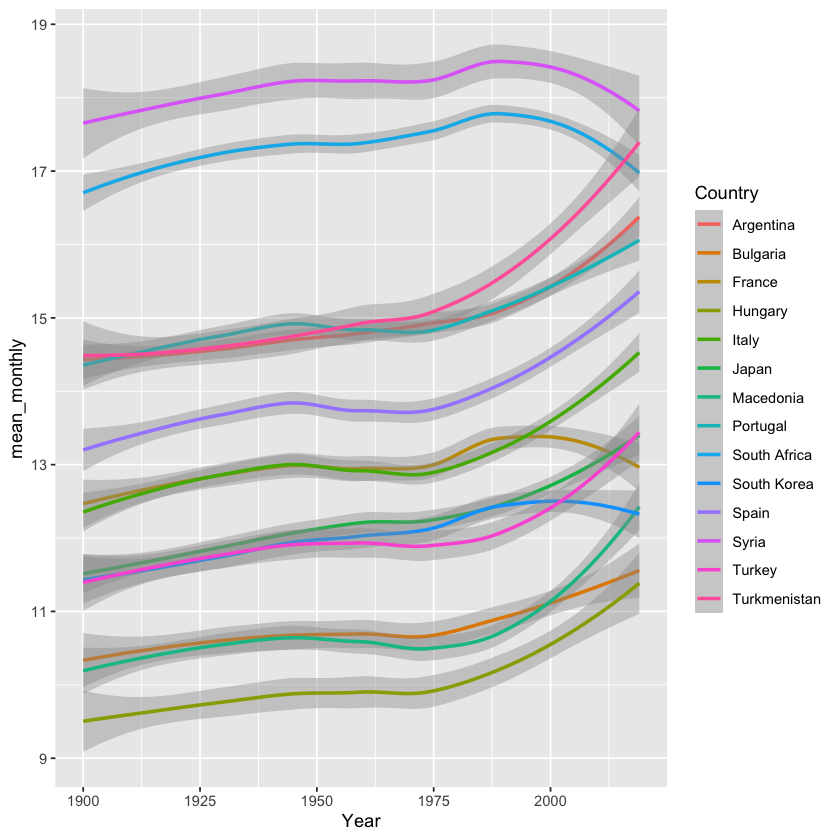

In [196]:
data_country %>%
    filter(temp_category == "Medium") %>%
    ggplot(aes(x = Year, y = mean_monthly, color = Country)) + geom_smooth()

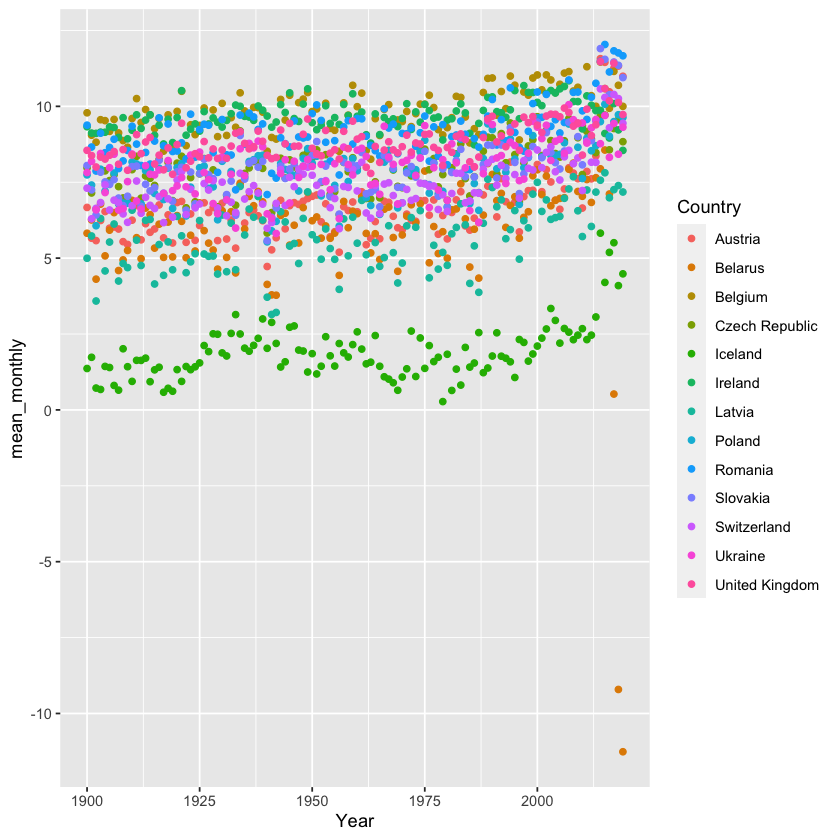

In [197]:
data_country %>%
    filter(temp_category == "Low") %>%
    ggplot(aes(x = Year, y = mean_monthly, color = Country)) + geom_point()

## Above 3 graphs shows that all category of countries based on temperature buckets are showing consistently increasing temperatures across years.

### Let us now see for India

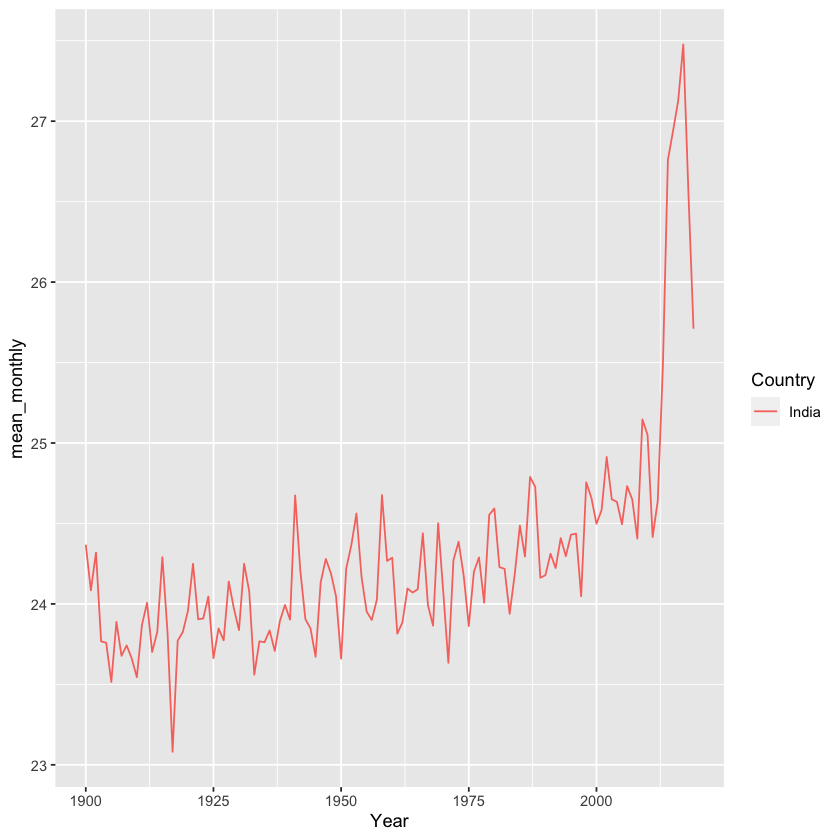

In [198]:
#Analysis for India, shows the increase in Average mean temperature over the years
data_country %>%
    filter(Country == "India") %>%
    ggplot(aes(x = Year, y = mean_monthly, color = Country)) + geom_line()

# Analysis for United Arab Emirates as it has the maximum mean temperature from 1900-2019

In [68]:
temp_data <- data %>% 
    group_by(Country) %>%
    summarize(mean_temp = mean(Temp))
temp_data[which.max(temp_data$mean_temp),]
temp_data[which.min(temp_data$mean_temp),]

 uae_temp  <- data %>% 
    filter(Country == 'United Arab Emirates') %>%
    group_by(Year) %>%
    summarize(mean_temp = mean(Temp))   


Country,mean_temp
<chr>,<dbl>
United Arab Emirates,27.90601


Country,mean_temp
<chr>,<dbl>
Iceland,1.935896


# A tibble: 120 × 2
    Year mean_temp
   <dbl>     <dbl>
 1  1900      27.6
 2  1901      27.6
 3  1902      27.9
 4  1903      27.1
 5  1904      27.6
 6  1905      27.5
 7  1906      27.4
 8  1907      27.3
 9  1908      27.4
10  1909      27.7
# … with 110 more rows


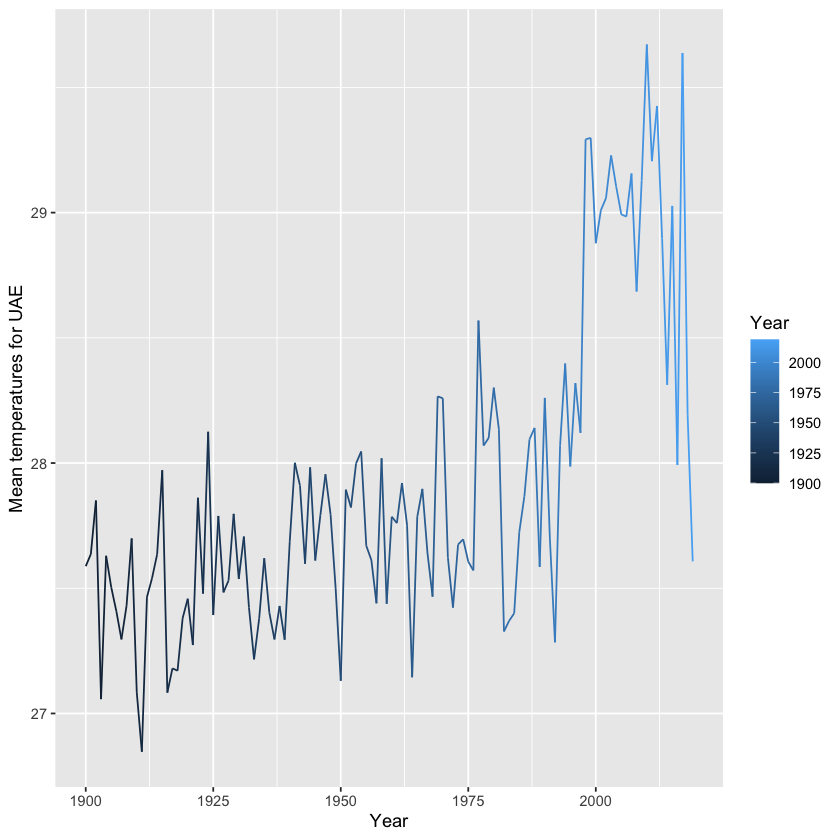

In [10]:
print(uae_temp)
ggplot(data=uae_temp, aes(x=Year,y=mean_temp,color=Year)) + geom_line() + ylab("Mean temperatures for UAE")

# Analysis for Iceland as it has the minimum mean temperature from 1900-2019

# A tibble: 120 × 2
    Year mean_temp
   <dbl>     <dbl>
 1  1900     1.36 
 2  1901     1.73 
 3  1902     0.720
 4  1903     0.674
 5  1904     1.43 
 6  1905     1.40 
 7  1906     0.806
 8  1907     0.651
 9  1908     2.01 
10  1909     1.42 
# … with 110 more rows


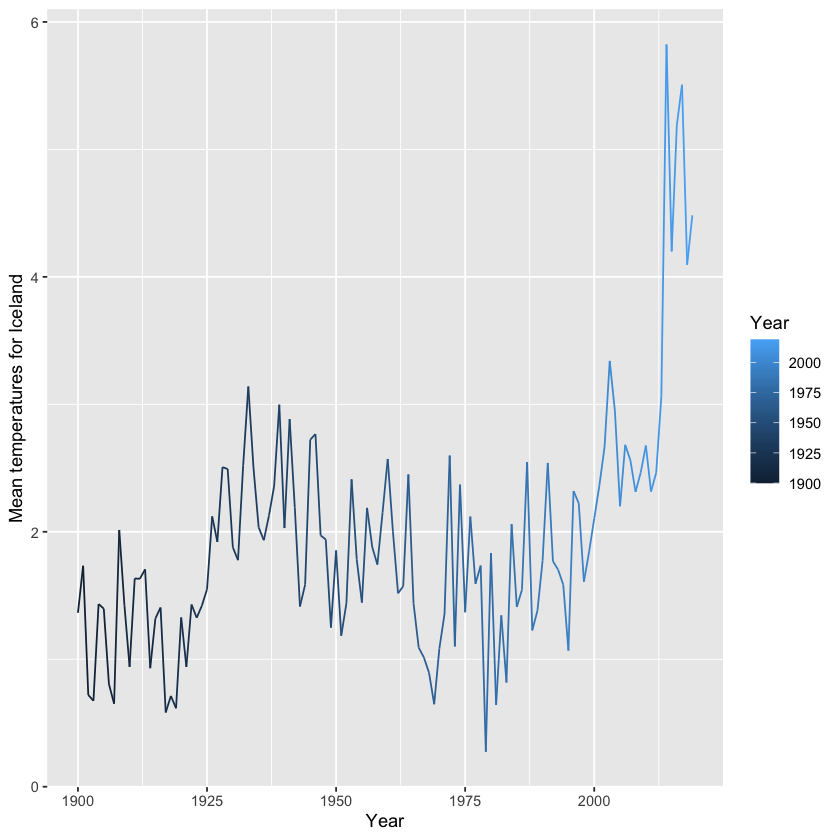

In [9]:
print(iceland_temp)
ggplot(data=iceland_temp, aes(x=Year, y=mean_temp, color=Year)) + geom_line() + ylab("Mean temperatures for Iceland")


## Let us examine the annual averages and min/max temperatures variations

Below we can see that all averages and max temperatures are increasing constantly across years.

In [221]:

global_land_temp <- data %>% group_by(Year) %>%
    summarize(global_temp = mean(Temp), min_global_temp = min(Temp), max_global_temp = max(Temp))
global_land_temp

global_land_temp[which.min(global_land_temp$min_global_temp),]


Year,global_temp,min_global_temp,max_global_temp
<dbl>,<dbl>,<dbl>,<dbl>
1900,14.71944,-7.592,35.888
1901,14.56070,-7.638,36.899
1902,14.25471,-9.218,36.276
1903,14.50130,-5.114,37.045
1904,14.41477,-7.273,36.028
1905,14.38559,-8.921,36.484
1906,14.49850,-5.552,35.884
1907,14.06884,-9.917,35.760
1908,14.21714,-6.227,35.553


Year,global_temp,min_global_temp,max_global_temp
<dbl>,<dbl>,<dbl>,<dbl>
2016,15.4744,-59.32407,39.75986


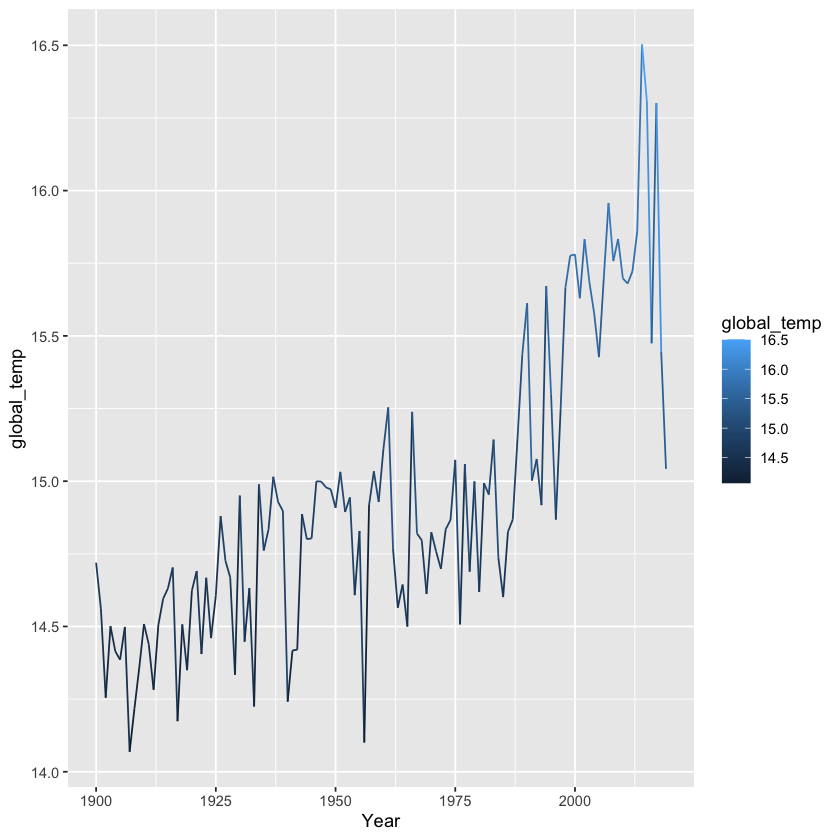

In [222]:
ggplot(data=global_land_temp,aes(x=Year,y=global_temp,color=global_temp))+geom_line()

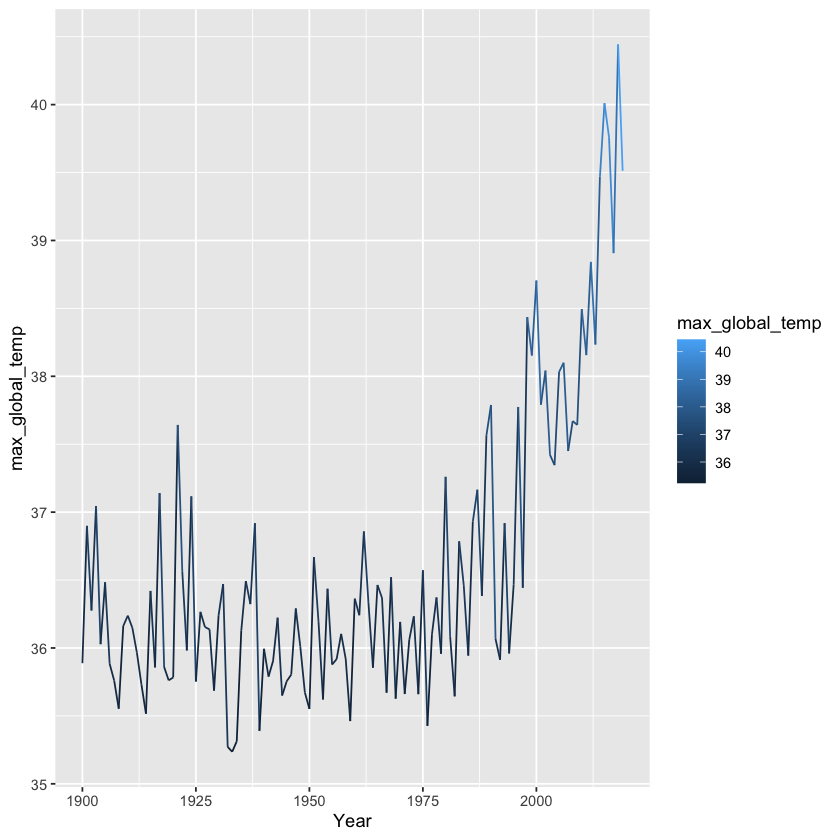

In [224]:
ggplot(data=global_land_temp,aes(x=Year,y=max_global_temp,color=max_global_temp))+geom_line()

#### The extreme winter average in graph is from Polar vortex year 2014 in graph below

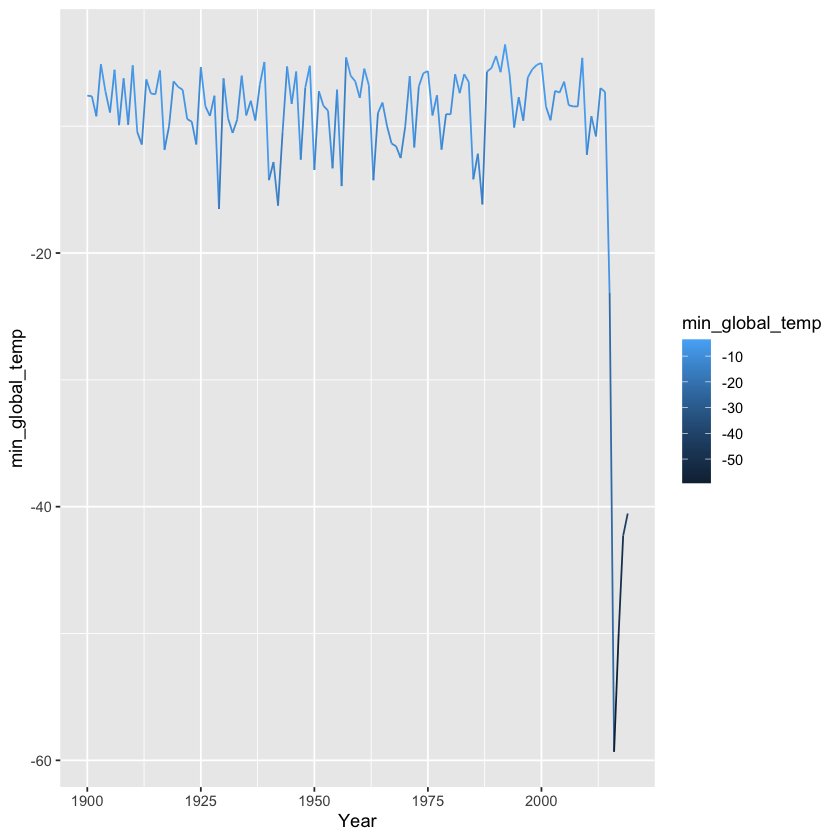

In [223]:
ggplot(data=global_land_temp,aes(x=Year,y=min_global_temp,color=min_global_temp))+geom_line()

## Let us examine the change in temperatures across years for each month.

In [227]:
monthly_averages <- data %>%
    group_by(Year, Month) %>%
    summarize(mean_monthly = mean(Temp), min_monthly = min(Temp), max_monthly = max(Temp))
head(monthly_averages)

`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


Year,Month,mean_monthly,min_monthly,max_monthly
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1900,1,6.566816,-7.592,25.764
1900,2,8.274579,-6.311,26.385
1900,3,9.508289,-3.513,26.838
1900,4,14.063868,-0.787,28.777
1900,5,17.517658,2.652,31.070
1900,6,20.754000,7.529,34.786


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



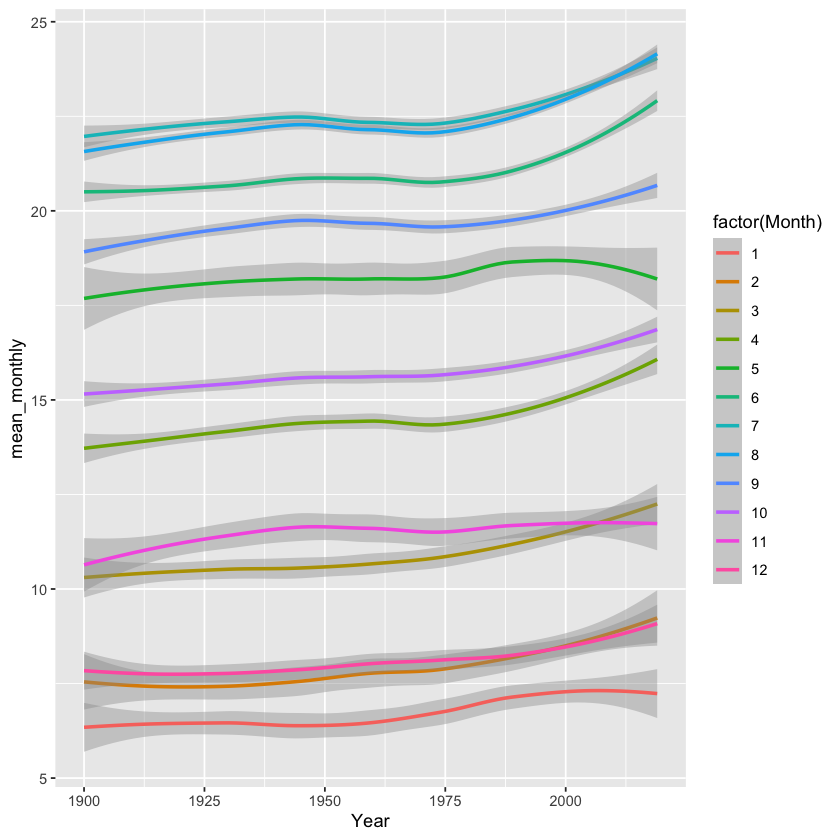

In [234]:
monthly_averages %>%
    ggplot(aes(x = Year, y = mean_monthly, color = factor(Month))) +
    geom_smooth()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



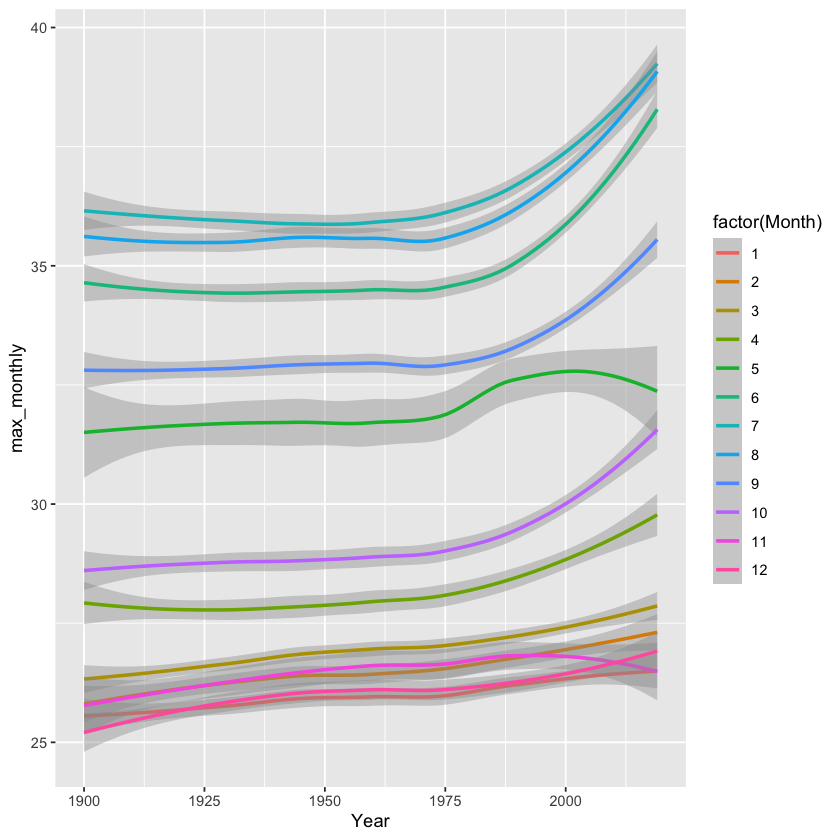

In [235]:
monthly_averages %>%
    ggplot(aes(x = Year, y = max_monthly, color = factor(Month))) +
    geom_smooth()

### Above graph shows that except for the season changing months of May and November all months have average temperatures increasing in the last 119 years and more importantly the max temperatures recorded in the months are increasing more drastically.